In [105]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import StratifiedKFold
from sklearn.externals.six.moves import xrange
from sklearn.mixture import GMM
from scipy.stats import multivariate_normal
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
%matplotlib inline

** Example of wirking with contour plots (adding level bar and etc.) **

(200, 200, 2)


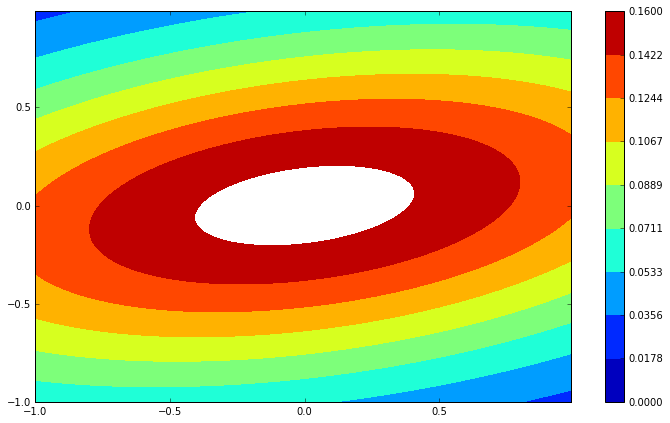

In [76]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
print(pos.shape)
levels = np.linspace(0, 0.16, 10)

rv = multivariate_normal([0, 0], [[2.0, 0.3], [0.3, 0.5]])
plt.figure(figsize = (12,7))
CS = plt.contourf(x, y, rv.pdf(pos), levels)
plt.colorbar(CS)

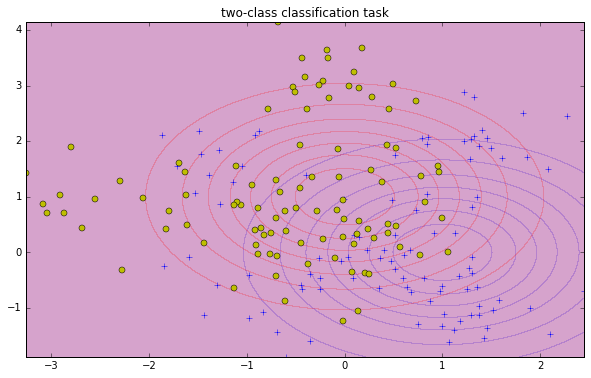

In [93]:
np.random.seed(2)
norm_for_blue = multivariate_normal([1, 0], np.eye(2))
norm_for_oran = multivariate_normal([0, 1], np.eye(2))

blue_means = np.random.multivariate_normal([1, 0], np.eye(2), size = 10)
oran_means = np.random.multivariate_normal([0, 1], np.eye(2), size = 10)


retrieved_blue_means_indices = np.random.choice(range(len(blue_means)), size = 100)
retrieved_oran_means_indices = np.random.choice(range(len(oran_means)), size = 100)

retrieved_blue_means = blue_means[retrieved_blue_means_indices]
retrieved_oran_means = oran_means[retrieved_oran_means_indices]

blue_samples = np.empty(retrieved_blue_means.shape)
oran_samples = np.empty(retrieved_oran_means.shape)

for ind, one_mean in enumerate(retrieved_blue_means):
    blue_samples[ind,:] = np.random.multivariate_normal(one_mean, np.eye(2) / 5, size = 1)

for ind, one_mean in enumerate(retrieved_oran_means):
    oran_samples[ind,:] = np.random.multivariate_normal(one_mean, np.eye(2) / 5, size = 1)

x_min = min(np.hstack((blue_samples[:,0], oran_samples[:,0])))
x_max = max(np.hstack((blue_samples[:,0], oran_samples[:,0])))
y_min = min(np.hstack((blue_samples[:,1], oran_samples[:,1])))
y_max = max(np.hstack((blue_samples[:,1], oran_samples[:,1])))

x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
grid_data = np.empty(x.shape + (2,))
grid_data[:, :, 0] = x; grid_data[:, :, 1] = y

plt.figure(figsize=(10,6))    
plt.plot(blue_samples[:,0], blue_samples[:,1], 'b+', oran_samples[:,0], oran_samples[:,1], 'yo')
CS = plt.contourf(x, y, norm_for_blue.pdf(grid_data), alpha = 0.2, colors='blue')
CS = plt.contourf(x, y, norm_for_oran.pdf(grid_data), alpha = 0.2, colors='red')

plt.title('two-class classification task')
plt.show()

** Try to fit a linear model in this task **

error rate =  0.255


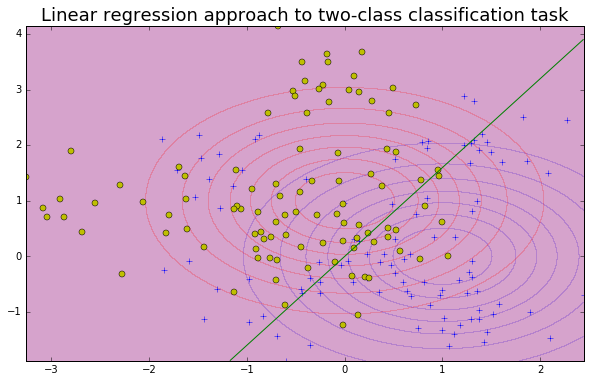

In [114]:
responses = np.zeros(blue_samples.shape[0] + oran_samples.shape[0])
responses[0:blue_samples.shape[0]] = np.ones(blue_samples.shape[0])
responses = 2 * responses - 1
lin_regression_model = LinearRegression()
lin_regression_model = lin_regression_model.fit(np.vstack((blue_samples, oran_samples)), responses)

predictions = np.array(lin_regression_model.predict(np.vstack((blue_samples, oran_samples))) > 0, dtype = int)
predictions = 2 * predictions - 1

error = sum(predictions != responses) / len(predictions)
print("error rate = ", error)

fitted_coef = lin_regression_model.coef_

# find y-values on the desicion-line
y_values = - fitted_coef[0] * x[:,0] / fitted_coef[1]
# find those which fit into the frame of grid_data
indices_retrieved = np.logical_and(y_values > y_min, y_values < y_max) 
x_values = x[:,0][indices_retrieved]
y_values = y_values[indices_retrieved]


plt.figure(figsize=(10,6))    
plt.plot(blue_samples[:,0], blue_samples[:,1], 'b+', oran_samples[:,0], oran_samples[:,1], 'yo')
CS = plt.contourf(x, y, norm_for_blue.pdf(grid_data), alpha = 0.2, colors='blue')
CS = plt.contourf(x, y, norm_for_oran.pdf(grid_data), alpha = 0.2, colors='red')

plt.plot(x_values, y_values, color='green', linewidth=1)
plt.title('Linear regression approach to two-class classification task', fontsize=18)
plt.show()

** ... k-nearest neighbors **

error rate =  0.0


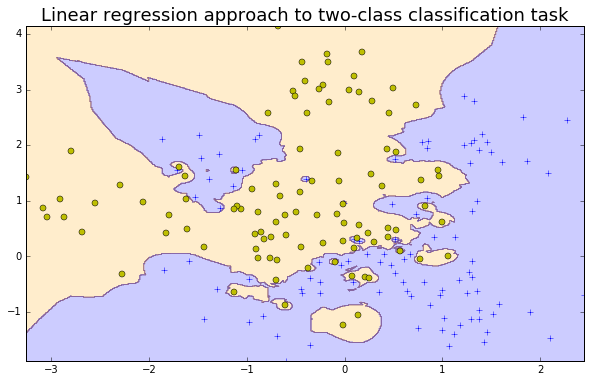

In [136]:
responses = np.zeros(blue_samples.shape[0] + oran_samples.shape[0])
responses[0:blue_samples.shape[0]] = np.ones(blue_samples.shape[0])
responses = 2 * responses - 1

neighbor_model = neighbors.KNeighborsClassifier(5, weights='distance')
neighbor_model.fit(np.vstack((blue_samples, oran_samples)), responses)


predictions = np.array(neighbor_model.predict(np.vstack((blue_samples, oran_samples))) > 0, dtype = int)
predictions = 2 * predictions - 1

error = sum(predictions != responses) / len(predictions)
print("error rate = ", error)

line_colours = ('Orange', 'Blue')

predictions_on_grid = neighbor_model.predict(np.hstack((np.ndarray.flatten(x)[:,None],np.ndarray.flatten(y)[:,None])))
predictions_on_grid = predictions_on_grid.reshape(x.shape)

plt.figure(figsize=(10,6))    
plt.plot(blue_samples[:,0], blue_samples[:,1], 'b+', oran_samples[:,0], oran_samples[:,1], 'yo')
CS = plt.contourf(x, y, predictions_on_grid, alpha = 0.2, colors = line_colours)

plt.title('Linear regression approach to two-class classification task', fontsize=18)
plt.show()